# EPIC 4 - Become a Carer - T38.1 - Primary Carer, Time Spending, Selected Recipient
This Jupyter Notebook is about preparing 'Number of primary carers, by age and sex, 2018' XLS file for being used in Mo-Buddy Website Solution.
1. Read Raw Data
2. Clean Raw Data
3. Export Clean Data

- Table_29.1 - Carer status by sex, age
- Table_30.1 - Carer status, recipient, disability status, age, sex
- Table_31.1 - Carer status, by geographic location, age, sex
- Table_32.1 - 15-.. yo, carer status, sex 
- Table_33.1 - Employed 15-64 yo, carer status, sex 
- Table_34.1 - Primary Carer, recipient, age, sex
- Table_35.1 - Carer and recipient living in or other households, age
- Table_36.1 - Primary Carer, Time spending in care, sex  ****
- Table_37.1 - Primary Carer, age, time spending in care, disability status, ***** 
- Table_38.1 - Primary Carer, time spending in care, select recipint   ****
- Table_39.1 - Primary Carer, reason for taking a carer, sex   ****
- Table_40.1 - Primary Carer, reason for taking a carer, age of recipient ****
- Table_41.1 - Primary Carer, satisfaction of service recieved, sex, age  ****
- Table_42.1 - Primary Carer, social community participation with recipient, time spending in car, age  ****
- Table_43.1 - Primary Carer, social community participation without recipient, time spending in car, age  ****

In [1]:
# Import Packages
import pandas as pd
import itertools
# import re

In [2]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

## 1. Read in Raw Data from a XLS file

In [3]:
# Function for reading in raw data from a XLS file
def read_in_data(file_path, sheet_name):
    """
    Function for reading in raw data from XLS file.
    Inputs: 
        - file_path, type: string, desc: XLS file path
        - sheet_name, type: string, desc: Sheet Name
    Outputs:
        - raw_data, type: dataframe, desc: Raw data
    """

    raw_data = pd.read_excel(io=file_path, sheet_name=sheet_name)
    
    return raw_data

In [4]:
# Read in data
filepath_raw_data = 'DataBases/44300do030.xls'
sheet_name = 'Table_38.1'
df_raw_carer_38 = read_in_data(filepath_raw_data, sheet_name)

In [5]:
# Check how the dataframe looks like
df_raw_carer_38

,Australian Bureau of Statistics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"44300DO030_2018 Disability, Ageing and Carers,...",NaN,NaN,NaN,NaN
1,Released at 11.30am (Canberra time) Thurs 24 O...,NaN,NaN,NaN,NaN
2,"Table 38.1 Primary carers, time spent caring f...",NaN,NaN,NaN,NaN
3,NaN,Average weekly hours spent caring,NaN,NaN,NaN
4,NaN,Less than 20 hours,20–39 hours,40 hours or more,Total
5,ESTIMATE ('000),NaN,NaN,NaN,NaN
6,Whether main recipient of care lives in same h...,NaN,NaN,NaN,NaN
7,Main recipient of care lives in same household,NaN,NaN,NaN,NaN
8,Recipient aged less than 15 years,28.2,18.7,71.5,124.5
9,Recipient aged 15 years and over with a profou...,NaN,NaN,NaN,NaN


## 2. Clean up Raw Data

In [6]:
# Drop useless rows and columns
col_names = df_raw_carer_38.iloc[4,:]
df_carer_38 = df_raw_carer_38.copy()
df_carer_38.drop(labels=[0,1,2,3,5,23,25,31,37,43,45,46,47], axis=0, inplace=True)
df_carer_38.reset_index(drop=True, inplace=True)
df_carer_38.columns = col_names
df_carer_38.columns.names = ['']
df_carer_38

,NaN,Less than 20 hours,20–39 hours,40 hours or more,Total
0,NaN,Less than 20 hours,20–39 hours,40 hours or more,Total
1,Whether main recipient of care lives in same h...,NaN,NaN,NaN,NaN
2,Main recipient of care lives in same household,NaN,NaN,NaN,NaN
3,Recipient aged less than 15 years,28.2,18.7,71.5,124.5
4,Recipient aged 15 years and over with a profou...,NaN,NaN,NaN,NaN
5,Can cope on his or her own for -,NaN,NaN,NaN,NaN
6,A few days without difficulty,65,10.6,11.9,90.1
7,A few days with difficulty,33.4,14.7,5.8,57.8
8,One day without difficulty,23,14.6,19.7,59.8
9,One day with difficulty,17.7,17,17,55.6


In [7]:
miss_idx = df_carer_38['Less than 20 hours'].isna()
missing_idx = df_carer_38.loc[miss_idx,:].index.values
levels_lis = list(df_carer_38.iloc[missing_idx,0])
levels_lis

['Whether main recipient of care lives in same household',
 'Main recipient of care lives in same household',
 'Recipient aged 15 years and over with a profound or severe core activity limitation',
 'Can cope on his or her own for -',
 'Persons aged 15-64 years',
 'Labour force status of carer',
 'Persons aged 65 years and over',
 'Labour force status of carer',
 'Persons aged 15 years and over',
 'Labour force status of carer']

In [8]:
# Reset index and prepare for adding multiindex (in column)
df_carer_38.drop(labels=[0,1,2,4,5,19,20,24,25,29,30], axis=0, inplace=True)
df_carer_38.rename(columns={df_carer_38.columns[0]:'Index'}, inplace=True)
df_carer_38.set_index(keys='Index', drop=True, inplace=True)
df_carer_38

,Less than 20 hours,20–39 hours,40 hours or more,Total
Index,,,,
Recipient aged less than 15 years,28.2,18.7,71.5,124.5
A few days without difficulty,65,10.6,11.9,90.1
A few days with difficulty,33.4,14.7,5.8,57.8
One day without difficulty,23,14.6,19.7,59.8
One day with difficulty,17.7,17,17,55.6
A few hours without difficulty,23.1,25.2,38.5,89.5
A few hours with difficulty,3.6,9.5,20.2,36.4
Less than one hour without difficulty,14.5,11.5,21.4,48.8
Less than one hour with difficulty,1.4,2.8,15,21


In [9]:
# Adding multiIndex (in column)
first_level = ['Average weekly hours spent caring', 'Total']
second_level = list(col_names)[1:-1]
levels_1_1 = list(itertools.product([first_level[0]], second_level[0:3]))
levels_1_2 = list(itertools.product([first_level[1]], ['Total']))
levels = levels_1_1 + levels_1_2
df_carer_38.columns = pd.MultiIndex.from_tuples(levels, names=["Type", "Time"])
df_carer_38.reset_index(inplace=True)
df_carer_38

Type                                              Index  \
Time                                                      
0                     Recipient aged less than 15 years   
1                         A few days without difficulty   
2                            A few days with difficulty   
3                            One day without difficulty   
4                               One day with difficulty   
5                        A few hours without difficulty   
6                           A few hours with difficulty   
7                 Less than one hour without difficulty   
8                    Less than one hour with difficulty   
9           Cannot be left alone for less than one hour   
10                                                Total   
11    Recipient aged 15 years and over without a pro...   
12                                                Total   
13               Main recipient of care lives elsewhere   
14                                             Employed   
15                                           Unemployed   
16                              Not in the labour force   
17                                             Employed   
18                                           Unemployed   
19                              Not in the labour force   
20                                             Employed   
21                                           Unemployed   
22                              Not in the labour force   
23                                                Total   

Type Average weekly hours spent caring                               Total  
Time                Less than 20 hours 20–39 hours 40 hours or more  Total  
0                                 28.2        18.7             71.5  124.5  
1                                   65        10.6             11.9   90.1  
2                                 33.4        14.7              5.8   57.8  
3                                   23        14.6             19.7   59.8  
4                                 17.7          17               17   55.6  
5                                 23.1        25.2             38.5   89.5  
6                                  3.6         9.5             20.2   36.4  
7                                 14.5        11.5             21.4   48.8  
8                                  1.4         2.8               15     21  
9                                  5.6        10.8             43.4   61.1  
10                               183.5       111.4            195.1  517.2  
11                                24.2           5              7.2   40.1  
12                               233.8       134.4            274.3  681.7  
13                               142.2        24.6             11.2  178.4  
14                               198.8        57.5             81.9  350.8  
15                                11.4         3.7              6.6   21.3  
16                                67.6        44.5            130.7  257.3  
17                                16.4         6.6              7.7     32  
18                                   0           0                0      0  
19                                80.1        43.8             61.4  197.6  
20                               218.3        63.2             90.2  382.8  
21                                11.4         3.7              6.6   21.3  
22                               147.7        89.6            192.2  457.5  
23                               376.2       158.2            286.3  861.6

In [10]:
# Dropping useless rows
df_carer_38_1 =df_carer_38.copy()
# df_carer_36_1.drop(labels=[0] , axis=0, inplace=True)
# df_carer_36_1.reset_index(drop=True, inplace=True)
df_carer_38_1

Type                                              Index  \
Time                                                      
0                     Recipient aged less than 15 years   
1                         A few days without difficulty   
2                            A few days with difficulty   
3                            One day without difficulty   
4                               One day with difficulty   
5                        A few hours without difficulty   
6                           A few hours with difficulty   
7                 Less than one hour without difficulty   
8                    Less than one hour with difficulty   
9           Cannot be left alone for less than one hour   
10                                                Total   
11    Recipient aged 15 years and over without a pro...   
12                                                Total   
13               Main recipient of care lives elsewhere   
14                                             Employed   
15                                           Unemployed   
16                              Not in the labour force   
17                                             Employed   
18                                           Unemployed   
19                              Not in the labour force   
20                                             Employed   
21                                           Unemployed   
22                              Not in the labour force   
23                                                Total   

Type Average weekly hours spent caring                               Total  
Time                Less than 20 hours 20–39 hours 40 hours or more  Total  
0                                 28.2        18.7             71.5  124.5  
1                                   65        10.6             11.9   90.1  
2                                 33.4        14.7              5.8   57.8  
3                                   23        14.6             19.7   59.8  
4                                 17.7          17               17   55.6  
5                                 23.1        25.2             38.5   89.5  
6                                  3.6         9.5             20.2   36.4  
7                                 14.5        11.5             21.4   48.8  
8                                  1.4         2.8               15     21  
9                                  5.6        10.8             43.4   61.1  
10                               183.5       111.4            195.1  517.2  
11                                24.2           5              7.2   40.1  
12                               233.8       134.4            274.3  681.7  
13                               142.2        24.6             11.2  178.4  
14                               198.8        57.5             81.9  350.8  
15                                11.4         3.7              6.6   21.3  
16                                67.6        44.5            130.7  257.3  
17                                16.4         6.6              7.7     32  
18                                   0           0                0      0  
19                                80.1        43.8             61.4  197.6  
20                               218.3        63.2             90.2  382.8  
21                                11.4         3.7              6.6   21.3  
22                               147.7        89.6            192.2  457.5  
23                               376.2       158.2            286.3  861.6

In [11]:
levels_names = df_carer_38_1['Index'].unique()
levels_names

array(['Recipient aged less than 15 years',
       'A few days without difficulty', 'A few days with difficulty',
       'One day without difficulty', 'One day with difficulty',
       'A few hours without difficulty', 'A few hours with difficulty',
       'Less than one hour without difficulty',
       'Less than one hour with difficulty',
       'Cannot be left alone for less than one hour', 'Total',
       'Recipient aged 15 years and over without a profound or severe core activity limitation',
       'Main recipient of care lives elsewhere', 'Employed', 'Unemployed',
       'Not in the labour force'], dtype=object)

In [14]:
first_level = [levels_lis[0], levels_lis[4], levels_lis[6], levels_lis[8]]
first_level

['Whether main recipient of care lives in same household',
 'Persons aged 15-64 years',
 'Persons aged 65 years and over',
 'Persons aged 15 years and over']

In [27]:
second_level_1 = [levels_lis[1], levels_names[12]]
# second_level_1
second_level_2 = [levels_lis[5]]
# second_level_2

['Main recipient of care lives in same household',
 'Main recipient of care lives elsewhere']

In [22]:
third_level = list(levels_names[13:])
third_level

['Employed', 'Unemployed', 'Not in the labour force']

In [28]:
fourth_level = list(levels_names[1:9])
fourth_level

['A few days without difficulty',
 'A few days with difficulty',
 'One day without difficulty',
 'One day with difficulty',
 'A few hours without difficulty',
 'A few hours with difficulty',
 'Less than one hour without difficulty',
 'Less than one hour with difficulty']

In [133]:
# Adding multiIndex (in index)
levels_1 = list(itertools.product([first_level[0]],second_level, third_level))
levels_2 = list(itertools.product([first_level[1]],[second_level[3]], [first_level[1]]))
levels_all = levels_1 + levels_2
multi_index = pd.MultiIndex.from_tuples(levels_all, names=['Place', 'Age', 'Disability Status'])
df_carer_37_1.set_index(keys=multi_index, drop=True, inplace=True)
df_carer_37_1.drop(columns='Index', axis=1, inplace=True)
df_carer_37_1

C:\Users\Henry\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Type                                                                                                                                 Average weekly hours spent caring  \
Time                                                                                                                                                Less than 20 hours   
Place                                          Age                                   Disability Status                                                                   
Main recipient of care lives in same household Primary carers aged 15-44 years       Recipient has profound core activity limitation                                16   
                                                                                     Recipient has severe core activity limitation                                42.5   
                                                                                     All with reported disability                                                 63.2   
                                               Primary carers aged 45-64 years       Recipient has profound core activity limitation                              33.6   
                                                                                     Recipient has severe core activity limitation                                50.3   
                                                                                     All with reported disability                                                 91.2   
                                               Primary carers aged 65 years and over Recipient has profound core activity limitation                              28.7   
                                                                                     Recipient has severe core activity limitation                                38.7   
                                                                                     All with reported disability                                                 75.9   
                                               All primary carers                    Recipient has profound core activity limitation                              75.9   
                                                                                     Recipient has severe core activity limitation                               132.3   
                                                                                     All with reported disability                                                233.8   
Main recipient of care lives elsewhere         All primary carers                    Main recipient of care lives elsewhere                                      142.2   

Type                                                                                                                                              \
Time                                                                                                                                 20–39 hours   
Place                                          Age                                   Disability Status                                             
Main recipient of care lives in same household Primary carers aged 15-44 years       Recipient has profound core activity limitation        16.8   
                                                                                     Recipient has severe core activity limitation          14.9   
                                                                                     All with reported disability                           29.8   
                                               Primary carers aged 45-64 years       Recipient has profound core activity limitation        31.3   
                                                                                     Recipient has severe core activity limitation          23.9   
                                                                                     All with r

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
# plt.tick_params(labelsize=14)

In [135]:
# Plot for Age - Average weekly hours spent caring
df_carer_37_1_age = df_carer_37_1.loc[('Main recipient of care lives in same household', 
                                       'Primary carers aged 15-44 years'),('Average weekly hours spent caring')]
# Plot for Age - Average weekly hours spent caring
df_carer_37_2_age = df_carer_37_1.loc[('Main recipient of care lives in same household', 
                                       'Primary carers aged 45-64 years'),('Average weekly hours spent caring')]
# Plot for Age - Average weekly hours spent caring
df_carer_37_3_age = df_carer_37_1.loc[('Main recipient of care lives in same household', 
                                       'Primary carers aged 65 years and over'),('Average weekly hours spent caring')]
# Plot for All - Average weekly hours spent caring
df_carer_37_1_all = df_carer_37_1.loc[('Main recipient of care lives in same household', 
                                       'All primary carers'),('Average weekly hours spent caring')]

C:\Users\Henry\anaconda3\lib\site-packages\pandas\core\indexing.py:889: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


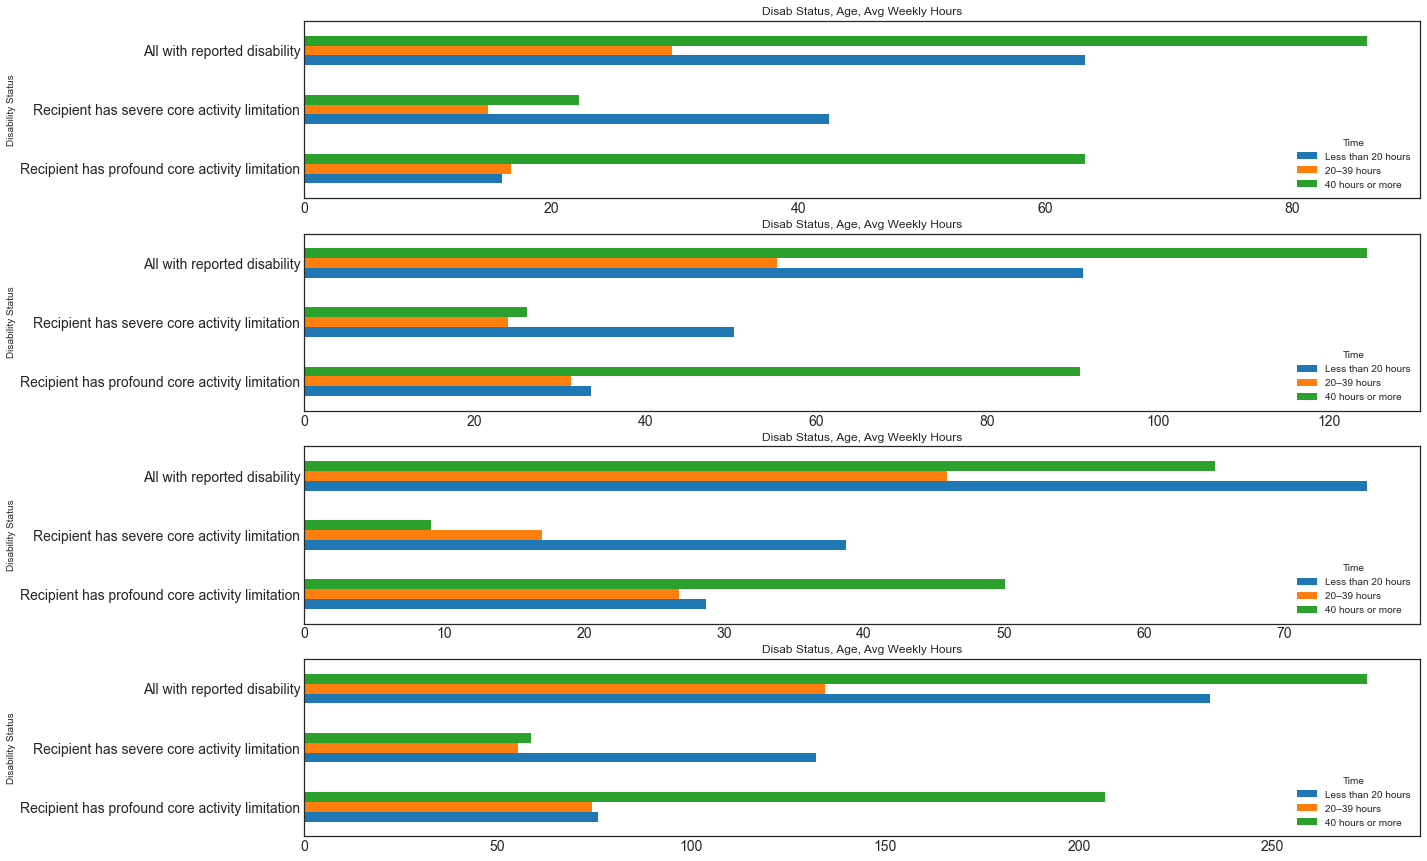

In [137]:
figure_size=(20,15)
fig, ax = plt.subplots(4, 1)
ax[0] = df_carer_37_1_age.plot.barh(figsize=figure_size, ax=ax[0], title='Disab Status, Age, Avg Weekly Hours', fontsize=14)
ax[1] = df_carer_37_2_age.plot.barh(figsize=figure_size, ax=ax[1], title='Disab Status, Age, Avg Weekly Hours', fontsize=14)
ax[2] = df_carer_37_3_age.plot.barh(figsize=figure_size, ax=ax[2], title='Disab Status, Age, Avg Weekly Hours', fontsize=14)
ax[3] = df_carer_37_1_all.plot.barh(figsize=figure_size, ax=ax[3], title='Disab Status, Age, Avg Weekly Hours', fontsize=14)

<ipython-input-138-d852c1c5fda3>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_carer_37_2_all = df_carer_37_1.loc[('Main recipient of care lives elsewhere'),('Average weekly hours spent caring')]


<AxesSubplot:title={'center':'Disab Status, Age, Avg Weekly Hours'}, ylabel='Age,Disability Status'>

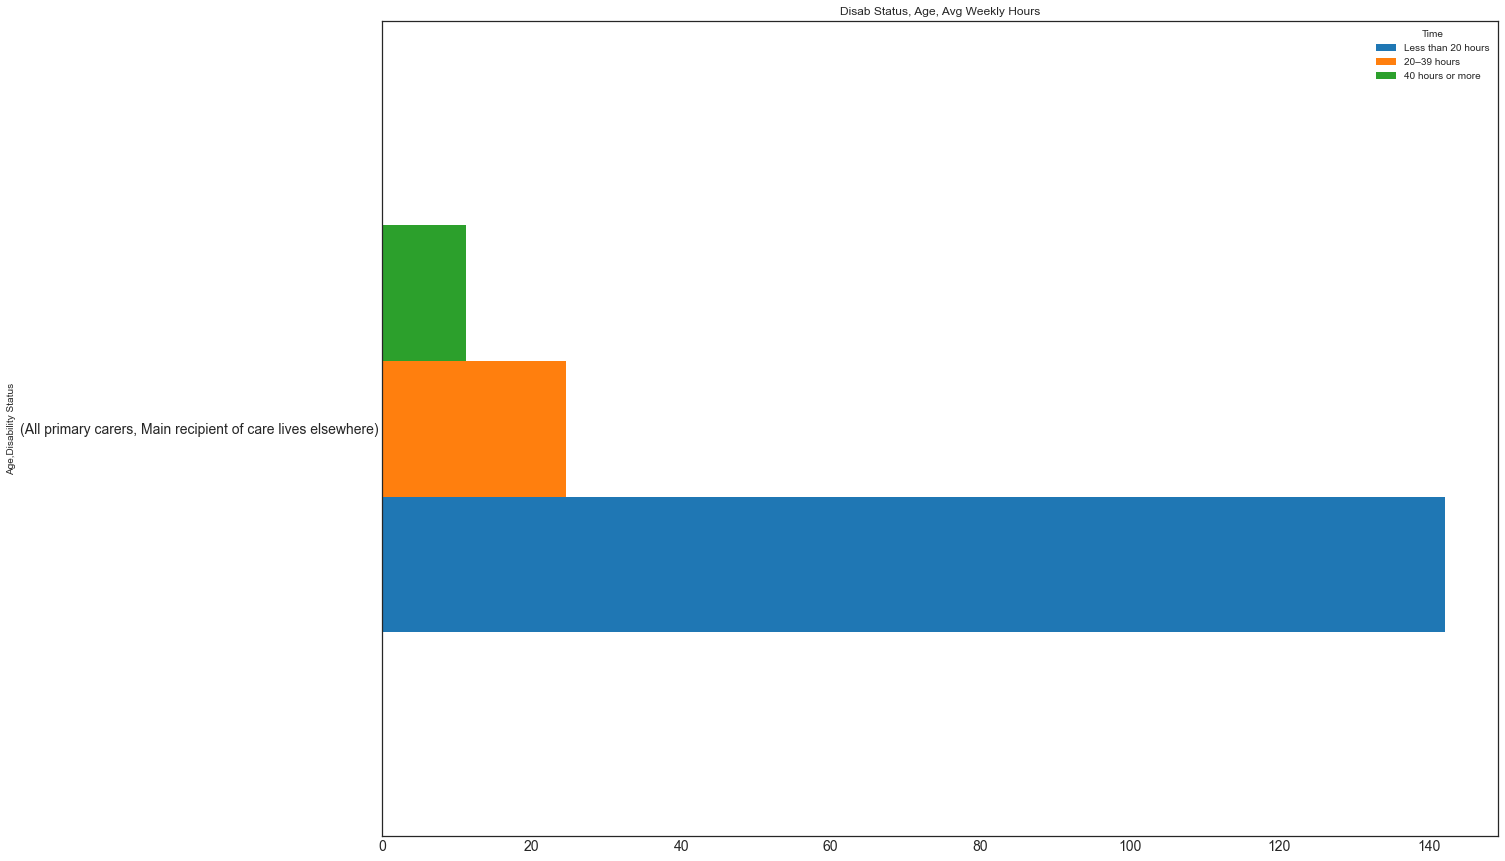

In [138]:
# Plot for All - Average weekly hours spent caring
df_carer_37_2_all = df_carer_37_1.loc[('Main recipient of care lives elsewhere'),('Average weekly hours spent caring')]
df_carer_37_2_all.plot.barh(figsize=figure_size, title='Disab Status, Age, Avg Weekly Hours', fontsize=14)

## 3. Export Clean Data to a CSV file

In [ ]:
# # Export full version
# df_freewifi.to_csv('Output\FreeWiFi\OK_Free_WiFi_Melbourne_V3.csv', index=False)